# Best Model

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn import metrics

from sklearn.metrics import classification_report

import pickle 

In [8]:
loan = pd.read_csv('../data/BB.DD_MODELOS.csv')
loan.shape

(460541, 50)

In [8]:
loan.head()

,Unnamed: 0,loan_acceptance,"('acc_now_delinq',)","('acc_open_past_24mths',)","('all_util',)","('annual_inc',)","('avg_cur_bal',)","('bc_util',)","('collections_12_mths_ex_med',)","('delinq_2yrs',)",...,"('tax_liens',)","('tot_cur_bal',)","('total_acc',)","('total_bal_ex_mort',)","('total_bc_limit',)","('total_cu_tl',)","('total_rev_hi_lim',)","('MORTGAGE',)","('OWN',)","('RENT',)"
0,0,1,-0.070414,1.010683,-4.391856,1.169092,0.632931,-1.756350,-0.121123,-0.373769,...,-0.136687,1.966093,1.645054,1.082435,0.364780,3.872116,0.169542,-0.990665,2.932031,-0.817319
1,1,1,-0.070414,-0.889720,2.588767,-0.388652,-0.712121,1.344204,-0.121123,-0.373769,...,-0.136687,-0.865215,-1.644651,-0.937178,-0.813060,-1.373566,-0.787800,-0.990665,-0.341061,1.223512
2,2,1,-0.070414,2.594353,-3.840754,0.518772,0.083906,-1.236562,-0.121123,-0.373769,...,-0.136687,0.889188,0.082444,-0.081508,3.037755,3.872116,1.523901,1.009422,-0.341061,-0.817319
3,3,1,-0.070414,0.693949,-4.391856,-0.358722,-0.783204,-1.443750,-0.121123,-0.373769,...,-0.136687,-0.830447,-0.411012,-0.823391,-0.082319,-1.373566,-0.081056,-0.990665,-0.341061,1.223512
4,4,1,-0.070414,0.060482,3.690971,-0.010558,1.173048,1.020700,-0.121123,0.716465,...,-0.136687,-0.074671,-1.315681,-0.468803,-0.841905,-1.373566,-0.804695,1.009422,-0.341061,-0.817319


In [9]:
data = loan.iloc[:,1:]
data.head()

,loan_acceptance,"('acc_now_delinq',)","('acc_open_past_24mths',)","('all_util',)","('annual_inc',)","('avg_cur_bal',)","('bc_util',)","('collections_12_mths_ex_med',)","('delinq_2yrs',)","('delinq_amnt',)",...,"('tax_liens',)","('tot_cur_bal',)","('total_acc',)","('total_bal_ex_mort',)","('total_bc_limit',)","('total_cu_tl',)","('total_rev_hi_lim',)","('MORTGAGE',)","('OWN',)","('RENT',)"
0,1,-0.070414,1.010683,-4.391856,1.169092,0.632931,-1.756350,-0.121123,-0.373769,-0.018151,...,-0.136687,1.966093,1.645054,1.082435,0.364780,3.872116,0.169542,-0.990665,2.932031,-0.817319
1,1,-0.070414,-0.889720,2.588767,-0.388652,-0.712121,1.344204,-0.121123,-0.373769,-0.018151,...,-0.136687,-0.865215,-1.644651,-0.937178,-0.813060,-1.373566,-0.787800,-0.990665,-0.341061,1.223512
2,1,-0.070414,2.594353,-3.840754,0.518772,0.083906,-1.236562,-0.121123,-0.373769,-0.018151,...,-0.136687,0.889188,0.082444,-0.081508,3.037755,3.872116,1.523901,1.009422,-0.341061,-0.817319
3,1,-0.070414,0.693949,-4.391856,-0.358722,-0.783204,-1.443750,-0.121123,-0.373769,-0.018151,...,-0.136687,-0.830447,-0.411012,-0.823391,-0.082319,-1.373566,-0.081056,-0.990665,-0.341061,1.223512
4,1,-0.070414,0.060482,3.690971,-0.010558,1.173048,1.020700,-0.121123,0.716465,-0.018151,...,-0.136687,-0.074671,-1.315681,-0.468803,-0.841905,-1.373566,-0.804695,1.009422,-0.341061,-0.817319


In [11]:
X = data.drop(['loan_acceptance'], axis = 1).values
Y = data['loan_acceptance'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1) # 90% Train 10% Test 

We use this model because it has good accuracy compare with the rest of the models, it is quite easy to interpret, and because it is quite easy send this model to production.

# Prueba

## Lectura

In [23]:
gh = pd.read_csv('../data/PRUEBA.csv')
loan.shape

(460541, 50)

## Split

In [24]:
TX = gh.drop(['loan_acceptance'], axis = 1).values
TY = gh['loan_acceptance'].values

In [12]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7074580614439623


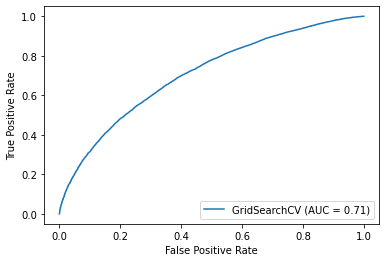

In [14]:
metrics.plot_roc_curve(loaded_model, X_test , Y_test)
plt.show()

As we can observe our AUC is 0.71, so this model is acceptable. 

## Alternative Model

This model was our first option. Unfortunately, after many hours waiting our laptop could not run the code.

The balance between the ROC, the Accuracy, the precision to predict the non-payers and the payers help us make our decision to choose the XGBoost.

In [ ]:
%%time 

param_test = {
    'n_estimators' : [200:1000],
    'eta' : [0,1],
    'objective' : ['binary:logistic'],
    'gammma' : [0,1], 
    'random_state' : [1234],
    'n_jobs' : [-2]    
}

gsearch = GridSearchCV(estimator = xgb(XGBClassifier(),
                                      param_grid = param_test, scoring = 'roc_auc', cv = 5)
                       

# Train the model
gsearch.fit(X_train, Y_train)